# Lab 7

In [1]:
from load_data import load_data
import numpy as np
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt
import helper as hlp
from load_data import imshowGray, load_data

# Load data and print the available keys for the data

In [2]:
data = load_data()
data.keys()

dict_keys(['dataMat1', 'ITest', 'VTest', 'meanTest', 'vecTest', 'mTest', 'vEigenTest1', 'vEigenTest2', 'faceDetection'])

# Task 1

In [3]:
def getEigenvectors(dataMat, k):
    # np.cov calculates the covariance matrix of x
    covMat = np.cov(dataMat.T)
    n = len(covMat)
    eigenvalues, eigenvectors = linalg.eigh(covMat, subset_by_index = [n - k, n - 1] )
    # Reverse the order of elements in an array along the given axis.
    eigenvectors = np.flip(eigenvectors, axis = 1)
    
    return eigenvectors

def test(expected, args, method):
    act = method(*args)
    if np.array_equal(expected, np.around(act, decimals=8)):
        print(f'test successful')
    else:
        print(f'test failed for method {method.__name__}()\nexpected\t{expected}\ngot\t\t{act}')



# Test case 1
test_case_1 = np.array([[ 0.6778734,  -0.73517866],
                        [ 0.73517866,  0.6778734 ]])
test(test_case_1, [data['dataMat1'], 2], getEigenvectors)

# Test case 2
test_case_2 = np.array([[0.6778734] , [0.73517866]])
test(test_case_2, [data['dataMat1'], 1], getEigenvectors)


test successful
test successful


# Task 2

In [4]:
def getMean(dataMat):
    m = dataMat.mean(axis=0)
    return m

def test(expected, args, method):
    act = method(*args)
    if np.array_equal(expected, np.around(act, 4)):
        print(f'test successful')
    else:
        print(f'test failed for method {method.__name__}()\nexpected\t{expected}\ngot\t\t{act}')

# Test case 1
test(np.array([1.8100, 1.9100]), [data['dataMat1']], getMean)

test successful


# Task 3

In [5]:
def compressPCAVector(vec, mean, vEigen):
    # Centered vector vec - m, substract the mean
    vec_transformed = vEigen.T@(vec - mean)
    vec_compressed = (vEigen@vec_transformed) + mean
    return vec_compressed

def test(expected, args, method):
    act = method(*args)
    if np.array_equal(expected, np.around(act, 8)):
        print(f'test successful')
    else:
        print(f'test failed for method {method.__name__}()\nexpected\t{expected}\ngot\t\t{act}')

# Test case 1
test(np.array([0.60493717, 0.60307834]), [data['vecTest'], data['mTest'], data['vEigenTest1']], compressPCAVector)

# Test case 2
test(np.array([0.49991164, 0.69991839]), [data['vecTest'], data['mTest'], data['vEigenTest2']], compressPCAVector)


test successful
test successful


# Task 4

In [23]:
def transformImageToVector(M):
    V = M.reshape((M.shape[0]*M.shape[1]), 1)

    return V, [M.shape[0], M.shape[1]]

def transformVectorToImage(V, height, width):
    M = V.reshape(height, width)

    return M

def compressPCAImage(I, nEigenvectors, V, mean):
    V1, shape_image = transformImageToVector(I)
    # mean is also a image and must be transformed to a vector
    mean_vector = transformImageToVector(mean)[0]
    vEigen = V[:, :nEigenvectors]
    ICompressed = compressPCAVector(V1, mean_vector, vEigen)
    ICompressed = transformVectorToImage(ICompressed, shape_image[0], shape_image[1])

    return ICompressed

def test(expected, args, method):
    act = method(*args)
    if np.array_equal(expected, act):
        print(f'test successful')
    else:
        print(f'test failed for method {method.__name__}()\nexpected\t{expected}\ngot\t\t{act}')

# Test case 1
# Number of eigenvectors
nEigenvectors = 4
# compressPCAImage
test(np.array([[2141., 2144., 3267.],
              [3376., 2569., 4262.]]),
               [data['ITest'],
                nEigenvectors,
                data['VTest'],
                data['meanTest']],
               compressPCAImage)

ICompressed = compressPCAImage(data['ITest'], nEigenvectors, data['VTest'], data['meanTest'] )

test successful


## Task 5 

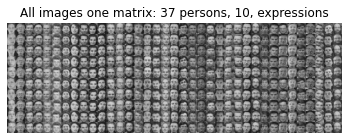

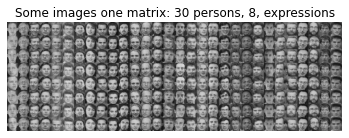

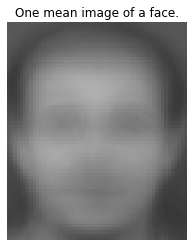

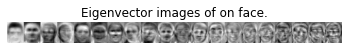

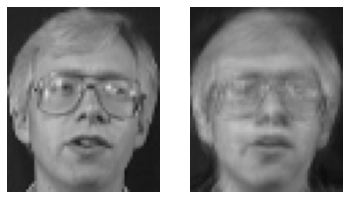

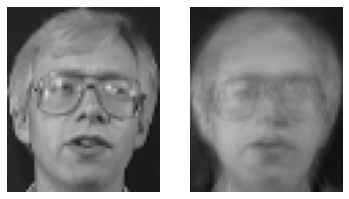

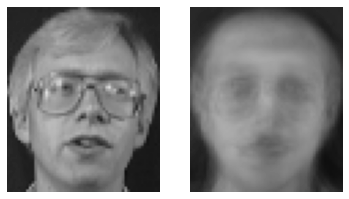

<Figure size 432x288 with 0 Axes>

In [7]:

nPerson = 37           # #persons used (<=37)
nExpression = 10       # #expressions used per person (<=10)
nEVShown = 20          # #EV shown as image
nEVConsidered = 100    # #EV evaluated (maximal number to be used)

plt.figure(1)
hlp.displaySourceImages(nPerson, nExpression)
plt.title(f'All images one matrix: {nPerson} persons, {nExpression}, expressions')
plt.show()

nId = 30                # used number of persons (nId <= 37)
nExpr = 8               # used number of poses (nExpr <= 10)

nY, nX = hlp.loadAndScaleImage(1, 1).shape     # pixels in x- und y-direction

fullPicture = np.zeros((nExpr*nY, nId*nX))                    # gallery
imgSet = np.zeros((nId*nExpr, nY*nX))

for i in range(nId):
    for j in range(nExpr):
        k = i*nExpr + j
        img = hlp.loadAndScaleImage(i+1, j+1)                 # Face in
        fullPicture[j*nY:(j+1)*nY, i*nX:(i+1)*nX] = img       # gallery
        imgSet[k, :], dims = hlp.transformImageToVector(img)  # as vector

plt.figure(2)
# plt.clf()
imshowGray(fullPicture)
plt.title(f'Some images one matrix: {nId} persons, {nExpr}, expressions')
plt.axis('off')
plt.show()


###########################################################################
# Setup of compression algorithm
#
vecMean = hlp.getMean(imgSet)                           # mean image (vector)
imgMean = hlp.transformVectorToImage(vecMean, dims)     # mean image

plt.figure(3)                                           # Darstellung mean
plt.clf()
imshowGray(imgMean)
plt.title(f'One mean image of a face.')
plt.axis('off')
plt.show()

evMatrix = hlp.getEigenvectors(imgSet, nEVConsidered)   # eigen vector matrix

nEVShown = 20                                           # Anzahl EV im Bild
imgEV = np.zeros((nY, nX*nEVShown))
for i in range(nEVShown):
    imgVector = evMatrix[:, i]
    minV = np.min(imgVector)
    maxV = np.max(imgVector)
    imgVector = (imgVector-minV)/(maxV-minV)            # Umskalierung (Grafik)
    imgEV[:, nX*i:nX*(i+1)] = hlp.transformVectorToImage(imgVector, dims)

plt.figure(4)                                           # Darstellung EV
imshowGray(imgEV)
plt.title(f'Eigenvector images of on face.')
plt.axis('off')
plt.show()


imgOrig = hlp.loadAndScaleImage(2, 4)

### your code
compressedImage = hlp.compressPCAImage(imgOrig, 50, evMatrix, imgMean)
imgComp1 = hlp.displayCompressionResult(imgOrig, compressedImage)
plt.figure(5)

compressedImage = hlp.compressPCAImage(imgOrig, 20, evMatrix, imgMean)
imgComp2 = hlp.displayCompressionResult(imgOrig, compressedImage)
plt.figure(6)

compressedImage = hlp.compressPCAImage(imgOrig, 10, evMatrix, imgMean)
imgComp3 = hlp.displayCompressionResult(imgOrig, compressedImage)
plt.figure(7)

plt.show()

imgOrig = hlp.loadAndScaleImage(31, 9)

## Task 6

In [24]:
data = load_data()
imgScene = data['faceDetection']
vecMean = getMean(imgSet)                           
imgMean = transformVectorToImage(vecMean, dims[0], dims[1]) 
evMatrix = getEigenvectors(imgSet, 100)


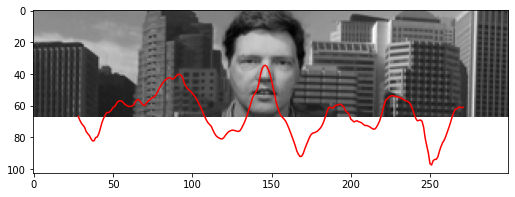

In [44]:


def faceDetector(img, d, evMatrix, mean):
    ssds = []
    for px in range(img.shape[1] - mean.shape[1]):
        current_img = img[:, px:px+mean.shape[1]]
        compressed_img = compressPCAImage(current_img, d, evMatrix, mean)
        ssd = ((current_img - compressed_img)**2).sum()
        ssds.append(ssd)
    
    return ssds

ssds = faceDetector(imgScene, 21, evMatrix, imgMean)
plt.figure(figsize=(10,3))
plt.imshow(imgScene, cmap='gray')
# plt.figure(figsize=(10,3))
plt.plot(np.arange(imgMean.shape[1] / 2, imgScene.shape[1] - imgMean.shape[1] /2), ssds, color='red')